In [1]:
import logging as log
import os
import os.path as path
import pickle
import subprocess
import sys
import time
from multiprocessing import Pool
from pathlib import Path
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle(path.join('..', 'data', 'feat_matrix.pkl'))
with open(path.join('..', 'data', 'features_x.txt'), 'rb') as f:
    features = pickle.load(f)

In [3]:
df.columns

Index(['Avg3MonthsSales', 'LastDayCustomers', 'IsWeekend', 'HolidayLastWeek',
       'SalesLog', 'Week', 'Type', 'AvgCustomersPromo', 'DayOfWeek', 'Promo',
       'AvgSchoolHoliday', 'AvgYearCustomers', 'SchoolHoliday', 'Year',
       'AvgPromo', 'LastDaySales', 'Customers', 'AvgYearSales', 'Id',
       'AvgCustomers', 'StateHoliday', 'DayOfMonth', 'AvgWeekSales',
       'AvgWeekCustomers', 'HolidayNextWeek', 'DayOfYear', 'Store', 'Month',
       'AvgCustomersSchoolHoliday', 'Sales', 'AvgSales', 'Avg3MonthsCustomers',
       'Outlier', 'DateInt', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSince', 'Promo2Weeks'],
      dtype='object')

In [32]:
df[df['Outlier']].groupby(['Store'])['Sales'].count().sort_values(ascending=False).head(10)

Store
103     306
708     251
349     237
972     236
674     192
560     189
837     186
25      186
1081    185
105     184
Name: Sales, dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['DateInt'].apply(str))
df = df.set_index('Date')

In [68]:
train = pd.read_csv('../data/train.csv', low_memory=False)
train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index('Date').sort_index()
train[train['Sales'] == 0].shape

(172871, 8)

In [93]:
df[df['Month'] == 11]['Sales'].mean()

7097.264284552845

In [94]:
df[df['Month'] == 12]['Sales'].mean()

8201.900283241543

In [97]:
df[df['Month'] == 10]['Sales'].mean()

6609.288017309205

In [69]:
train[(train['Open'] == 1) & (train['Sales'] == 0)].shape[0]

54

In [70]:
train[train['Sales'] > 0]['Sales'].median()

6369.0

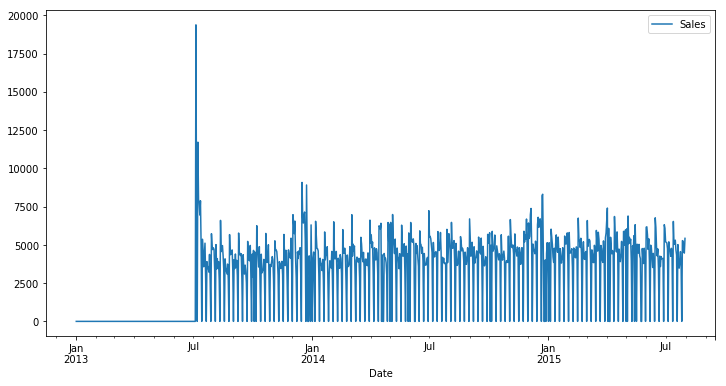

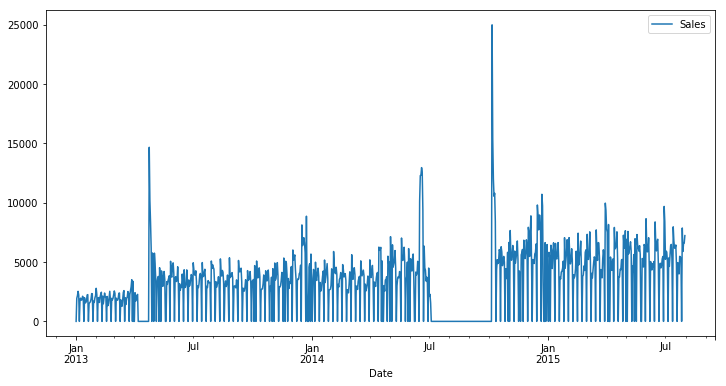

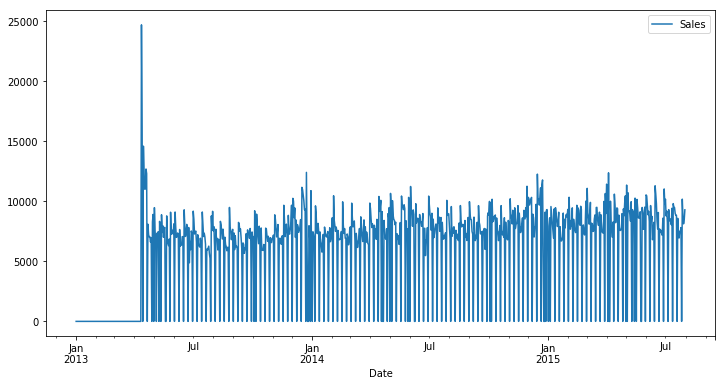

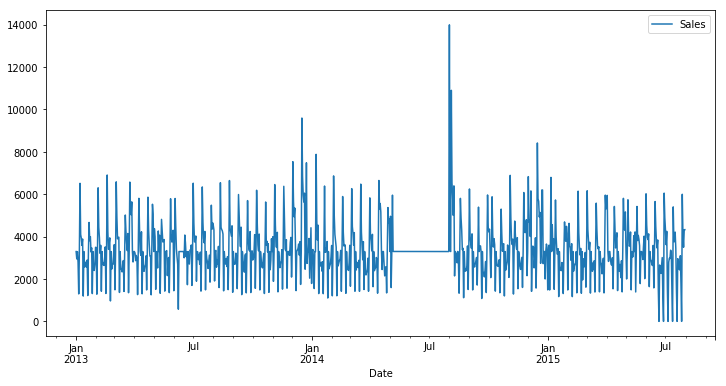

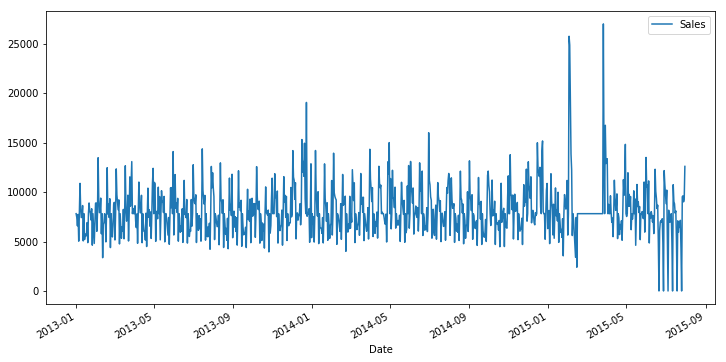

In [74]:
store_103 = train[train['Store'] == 103]
store_103[['Sales']].plot(figsize=(12,6))
store_708 = train[train['Store'] == 708]
store_708[['Sales']].plot(figsize=(12,6))
store_349 = train[train['Store'] == 349]
store_349[['Sales']].plot(figsize=(12,6))
store_972 = df[df['Store'] == 972]
store_972[['Sales']].plot(figsize=(12,6))
store_674 = df[df['Store'] == 674]
store_674[['Sales']].plot(figsize=(12,6))
plt.show()

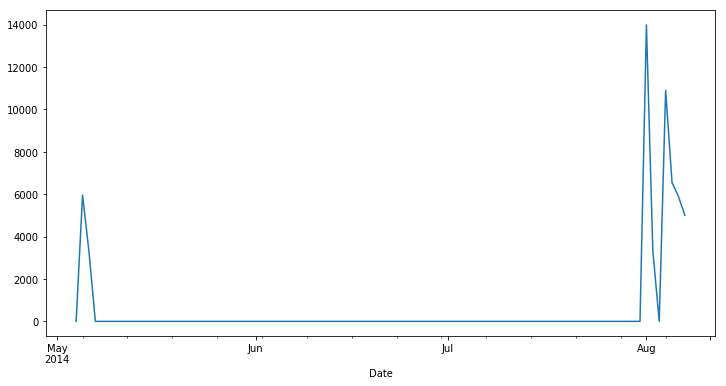

In [73]:
store_972[(store_972.index > '2014-05-03') & (store_972.index < '2014-08-08')]['Sales'].sort_index().plot(figsize=(12,6))

In [75]:
store = pd.read_csv('../data/store.csv', low_memory=False)

In [77]:
store[store['Store'] == 708]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
707,708,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"


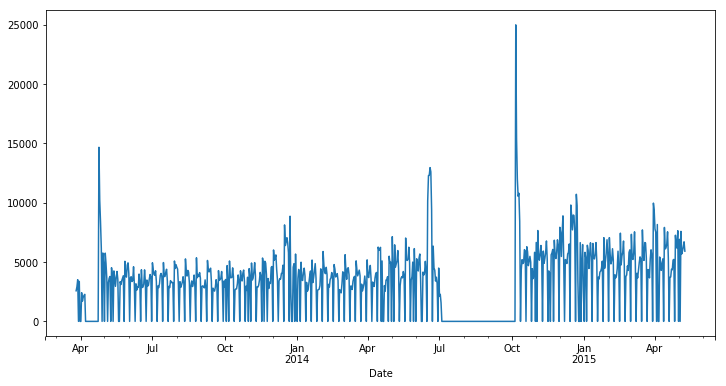

In [89]:
store_708[(store_708.index > '2013-03-25') & (store_708.index < '2015-05-10')]['Sales'].plot(figsize=(12,6))

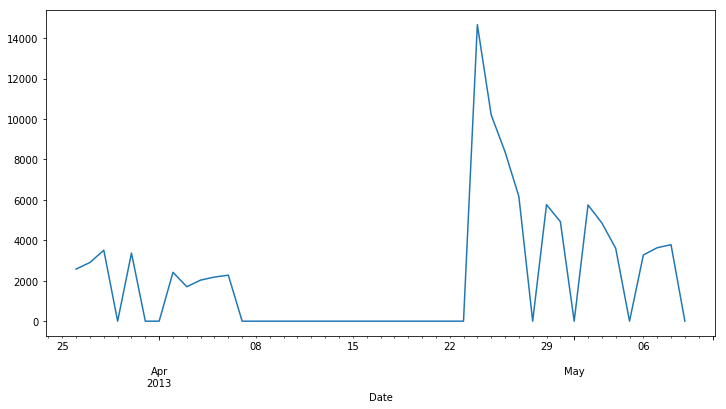

In [88]:
store_708[(store_708.index > '2013-03-25') & (store_708.index < '2013-05-10')]['Sales'].plot(figsize=(12,6))

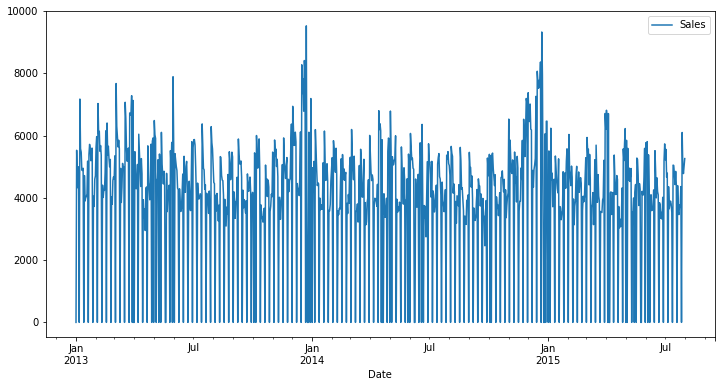

In [90]:
store_1 = train[train['Store'] == 1]
store_1[['Sales']].plot(figsize=(12,6))

In [91]:
store[store['Store'] == 1]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [11]:
outliers = pd.read_csv('../data/outliers.csv', low_memory=False, usecols=[1,2,3])

In [12]:
outliers.head()

,Store,Column,Count
0,30,SalesLog,1
1,40,SalesLog,3
2,61,SalesLog,1
3,62,SalesLog,1
4,83,SalesLog,2
